In [5]:
!pip install prettytable

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import os
import sys
import cv2
import matplotlib.pyplot as plt
from prettytable import PrettyTable 

%matplotlib inline



In [2]:
def gray(image): return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Stage 4: Result Evaluation

In [3]:
input_img = cv2.imread('./input.png')
output = gray(cv2.imread('./output.png'))
reference = gray(cv2.imread('./reference.png'))
print(input_img.shape)
print(output.shape)
print(reference.shape)

(392, 389, 3)
(388, 389)
(389, 390)


In [4]:
# thresholding the pixel into foreground or background
# return 1 for foreground, 0 for background
def value(p):
    if p < 0.25: # this is choosen by trial and error
        return 0
    else:
        return 1

# -----result evaluation-----
# TP: if output and referece pixel both are foreground
# FP: if output is foreground, reference is background
# FN: if output is background, reference is foreground

# completeness: TP/(TP+FP)
# correctness: TP/(TP+FP)
# quality: TP/(TP+FP+FN)
def result_eval(out_img, ref_img): 
    m1, n1 = out_img.shape
    m2, n2 = ref_img.shape
    TP = FP = FN = 0
    for i in range(min(m1, m2)):
        for j in range(min(n1, n2)): 
            out_p = value(out_img[i, j])
            ref_p = value(ref_img[i, j])
            if (ref_p==1 and out_p==1):
                TP += 1
            elif (ref_p==0 and out_p==1):
                FP += 1
            elif (ref_p==1 and out_p==0):
                FN += 1
    
    completeness = round(TP/(TP+FN), 5)
    correctness = round(TP/(TP+FP), 5)
    quality = round(TP/(TP+FP+FN), 5)
    print(TP, FN, FP)
    return completeness, correctness, quality

In [5]:
a, b, c = result_eval(output, reference)
print(a, b, c)


36981 12561 14302
0.74646 0.72112 0.57924


In [6]:
# function to print the table: paramenters: list of output and reference images
def conclusion_table(output_imgs, reference_imgs):  
    # Specify the Column Names while initializing the Table 
    myTable = PrettyTable(["Image", "Completeness", "Correctness", "Quality"]) 
    
    for i in range(len(output_imgs)):
        completeness, correctness, quality = result_eval(output_imgs[i], reference_imgs[i])
        # add rows
        myTable.add_row([i+1, completeness, correctness, quality])
  
    # print table
    print(myTable)

In [7]:
conclusion_table([output], [reference])

36981 12561 14302
+-------+--------------+-------------+---------+
| Image | Completeness | Correctness | Quality |
+-------+--------------+-------------+---------+
|   1   |   0.74646    |   0.72112   | 0.57924 |
+-------+--------------+-------------+---------+


In [52]:
# function to plot n number of (input_img, output_img, reference_img) in new row
def plot_images(input_imgs, output_imgs, reference_imgs):
    nrows = len(input_imgs)
    fig, ax = plt.subplots(nrows, 3, figsize=(20, 20), squeeze=False)
    for i in range(nrows):
        # test image: RGB
        ax[i][0].imshow(cv2.cvtColor(input_imgs[i], cv2.COLOR_BGR2RGB))
        ax[i][0].axis("off")
        ax[i][0].set_title("test image {}".format(i+1))
        
        # output image: gray scale
        ax[i][1].imshow(output_imgs[i], cmap = "gray")
        ax[i][1].axis("off")
        ax[i][1].set_title("output image {}".format(i+1))
        
        # reference image: gray scale
        ax[i][2].imshow(reference_imgs[i], cmap = "gray")
        ax[i][2].axis("off")
        ax[i][2].set_title("reference image {}".format(i+1))
    plt.tight_layout()
    plt.show()

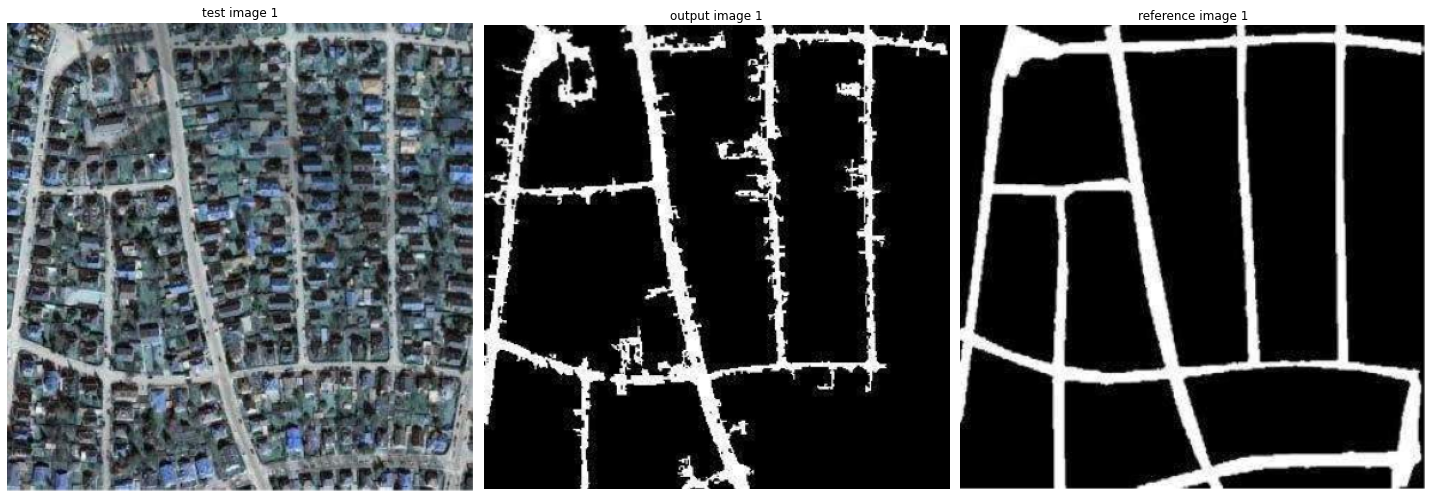

In [53]:
plot_images([input_img], [output], [reference])